# Big Bio Data Analysis: Assignement One

## Assignment Due: 13-Nov-2021

## Please Read The Instructions Below:

- This assignment is to be done individually.
- Please state your name clearly at the top of your notebook in markdown.
- Please state your registration number clearly at the top of your notebook in markdown.
- No cheating/duplicating of work will be tolerated.
- Please leave comments to capture the ideas you are trying to implement, failure to do so will lead to loss of marks.
- This assignment is marked out of 20 and contributes to your final result in this course.

## Dataset:
- For this assignment we shall use the **Heart Disease** dataset which can be found in the Data Folder.
- Please use the appropriate data for this assignment.

# Assignment Instruction:

Using the provided dataset, you are going to accomplish the task of taking it through the steps of machine learning as discussed in class. The steps to be looked at are stated below.

    - Data Cleansing: Clean your data appropriately
    - Data Preprocessing: Make the necessary transformations that you think are useful
    - EDA (Exploratory Data Analysis): Plot visuals to explain your investigations (all visuals should be done in seaborn library)
    - Creating Training/Validation Datasets: split your data into test and train: test data should be 25% of the total data.
    - Algorithm Selection: sample at least 8 algorithms of your own choice in this assignment and make appropriate comparisons.
    - Model Training: Train a base model from your final choice of algorithm
    - Model Testing: Test the model on your test data.
    - Communicate your findings.

### Please leave  your details below and change the name of this file to your own name: ie instead of Assignment One.ipyn it can be: 
```
Assignment One <your name>.ipynb

```
## Name of Student: SSEGAWA ABDULAKRIM
## Registration Number: 2020/HD07/20687U

#insert your code here below

In [1]:
# IMPORTING ALL LIBRARIES NEEDED FOR THE PROJECT ALONG WITH ALGORITHMS.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno


from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import optuna
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

# Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report, plot_confusion_matrix
from pandas_profiling import ProfileReport

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


import matplotlib.pyplot as plt

%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import missingno as msno
import warnings
warnings.simplefilter(action ="ignore")
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('max_columns',100)
pd.set_option('max_rows',900)

pd.set_option('max_colwidth',200)

df = pd.read_csv('../Data/Heart Disease/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## EXPLORATORY DATA ANALYSIS

In [4]:
# returning descriptive statistics for only numeric values not for categorical values. The describe() method summarizes the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [5]:
# understanding the datAa imported by looking at data types for columns and column names.This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage with the inclusion of verbose = true.
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# viewing the dimensions of the data frame
print(f"The dataset size: {df.shape}")

The dataset size: (918, 12)


### FINDING DUPLICATES IN THE DATA.

In [7]:
# finding duplicate values in the data frame
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool>

In [8]:
# succinct way of knowing how many duplicates we have which is 0 hence no duplicates.
df.duplicated().sum()

0

In [9]:
df.values

array([[40, 'M', 'ATA', ..., 0.0, 'Up', 0],
       [49, 'F', 'NAP', ..., 1.0, 'Flat', 1],
       [37, 'M', 'ATA', ..., 0.0, 'Up', 0],
       ...,
       [57, 'M', 'ASY', ..., 1.2, 'Flat', 1],
       [57, 'F', 'ATA', ..., 0.0, 'Flat', 1],
       [38, 'M', 'NAP', ..., 0.0, 'Up', 0]], dtype=object)

### FINDING MISSING VALUES.

In [11]:
# check missing values by returning boolean for either missing or non-missing
pd.isnull(df)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# succinct way to check missing values by summation
pd.isnull(df).sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
# Count the missing and null values for dataset fetal health.
miss_values = df.columns[df.isnull().any()]
print(f"Missing values:\n{df[miss_values].isnull().sum()}")

null_values = df.columns[df.isna().any()]
print(f"Null values:\n{df[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


#### There is no missing values and no Null values basing on the computations above.

In [14]:
# identifying numerical and categorical columns to know which columns will be required for computational reasons.

numerical= df.select_dtypes('number').columns
categorical = df.select_dtypes('object').columns
print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')


Categorical Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [15]:
#from pandas_profiling import ProfileReport

In [16]:
 # data.profile_report()
profile = ProfileReport(df, title='The prifile Report For Pandas', explorative=True)# create an object profile that contains visula data
profile

In [17]:
# finding dispersion from 0, which would implicate abnormal data if variance is high
df[categorical].nunique()
# there is no high variance and no zero variance , hence our data is normal

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [18]:
df['Sex'].unique() # the categorical unrepeated values for column Sex

array(['M', 'F'], dtype=object)

In [19]:
df['ChestPainType'].unique() # the categorical unrepeated values for column ChestPainType

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [20]:
df['RestingECG'].unique() # the categorical unrepeated values for column RestingECG

array(['Normal', 'ST', 'LVH'], dtype=object)

In [21]:
df['ExerciseAngina'].unique() # the categorical unrepeated values for column ExerciseAngina

array(['N', 'Y'], dtype=object)

In [22]:
df['ST_Slope'].unique() # the categorical unrepeated values for column ST_Slope

array(['Up', 'Flat', 'Down'], dtype=object)

In [23]:
#df['HeartDisease'].unique()

In [24]:
import seaborn as sns

<AxesSubplot:>

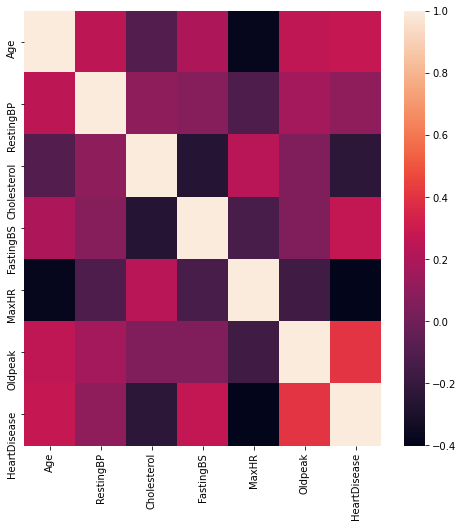

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(method='pearson'))

Text(0.5, 1.0, 'Data correlation matrix')

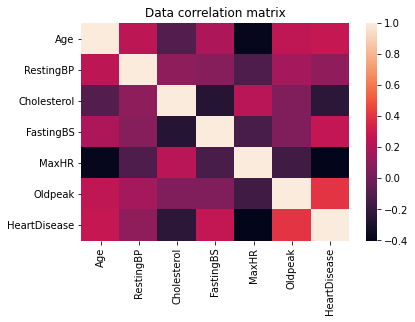

In [26]:
ax=sns.heatmap(df.corr(method='pearson'))
ax.set_title('Data correlation matrix')

### Analyze and visualize the target column (HeartDisease)

In [27]:
# generating descriptive stats for the column Heart Disease.
df["HeartDisease"].describe()

count    918.000000
mean       0.553377
std        0.497414
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HeartDisease, dtype: float64

In [77]:
# identifying our target variable or wat to predict as the y variable.
y = df['HeartDisease']
print(f'patients with a HeartDisease(Suspects):   ({y.value_counts()[1]} patient)\npatients  without a HeartDisease(Normal):  ({y.value_counts()[0]} patient)')

patients with a HeartDisease(Suspects):   (508 patient)
patients  without a HeartDisease(Normal):  (410 patient)


#### -Patients with heart disease are labeled Suspect (1)
####     -Patients without Heart Disease are  labeled Normal(0)

In [29]:
# finding descriptive statistics for the numerical variables
df[numerical].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [30]:
# zero = df['FastingBS'] ==0 #select all values that are zero , returns TRUE or FALSE
# zero
# newdf = df[zero == True] # select all rows with values =0
# newdf

In [31]:
# identifying correlation between variables, negatives are negative correlation, + are positive corelation, >0 is highly corrrelated ccolumns , we need to watch out for these.
numerical1= df.select_dtypes('number').columns
df[numerical1].corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


- Oldpeak (depression related number) has a positive correlation with the heart disease.
- Maximum heart rate has negative correlation with the heart disease.
- Interestingly cholesterol has negative correlation with the heart disease.

### ***Relationship between Gender and Heart Disease***

In [32]:
print (f'{round(df[df["Sex"]=="F"]["HeartDisease"].mean()*100)} % of females have a HeartDisease \n')
print (f'{round(df[df["Sex"]=="M"]["HeartDisease"].mean()*100)} %  men have a HeartDisease')



26 % of females have a HeartDisease 

63 %  men have a HeartDisease


### ***Relationship between Chest Pain Type and Heart Disease***

In [33]:
df.groupby('ChestPainType')['HeartDisease'].mean().sort_values(ascending=False)

ChestPainType
ASY    0.790323
TA     0.434783
NAP    0.354680
ATA    0.138728
Name: HeartDisease, dtype: float64

#### ***Relationship between RestingECG and Heart Disease***

In [34]:
df.groupby('RestingECG')['HeartDisease'].mean().sort_values(ascending=False)

RestingECG
ST        0.657303
LVH       0.563830
Normal    0.516304
Name: HeartDisease, dtype: float64

### ***Relationship between ExerciseAngina and Heart Disease***

In [35]:
df.groupby('ExerciseAngina')['HeartDisease'].mean().sort_values(ascending=False)

ExerciseAngina
Y    0.851752
N    0.351005
Name: HeartDisease, dtype: float64

### ***Relationship between ST_Slope and Heart Disease***

In [36]:
df.groupby('ST_Slope')['HeartDisease'].mean().sort_values(ascending=False)

ST_Slope
Flat    0.828261
Down    0.777778
Up      0.197468
Name: HeartDisease, dtype: float64

   ## ONE HOT ENCODING
   - using get_dummies() to convert string columns into one hot represesntation ie using 1's and 0's

In [37]:
## encoding Sex as 1's and 0's
df_Sex = pd.get_dummies(df['Sex'])
df = pd.concat([df, df_Sex], axis=1)
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,0,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,0,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,1,0


In [38]:
## encoding ChestPainType as 1's and 0's
df_cp = pd.get_dummies(df['ChestPainType'])
df = pd.concat([df, df_cp], axis=1)
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M,ASY,ATA,NAP,TA
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1,0,1,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1,0,1,0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0,1,0,0,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,0,1,0,0,0,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0,1,1,0,0,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,0,1,1,0,0,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,1,0,0,1,0,0


In [39]:
## encoding RestingECG as 1's and 0's
df_ecg = pd.get_dummies(df['RestingECG'])
df = pd.concat([df, df_ecg], axis=1)
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1,0,1,0,0,0,1,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0,0,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1,0,1,0,0,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0,1,0,0,0,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,0,1,0,0,0,1,0,1,0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0,1,1,0,0,0,0,1,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,0,1,1,0,0,0,0,1,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,1,0,0,1,0,0,1,0,0


In [40]:
## encoding ExerciseAngina as 1's and 0's
df_ex = pd.get_dummies(df['ExerciseAngina'])
df = pd.concat([df, df_ex], axis=1)
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1,0,1,0,0,0,1,0,1,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0,0,0,1,0,0,1,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1,0,1,0,0,0,0,1,1,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0,1,0,0,0,0,1,0,0,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,0,1,0,0,0,1,0,1,0,1,0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0,1,1,0,0,0,0,1,0,1,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,0,1,1,0,0,0,0,1,0,0,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,1,0,0,1,0,0,1,0,0,1,0


In [41]:
## encoding ST_Slope as 1's and 0's
df_st = pd.get_dummies(df['ST_Slope'])
df = pd.concat([df, df_st], axis=1)
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [42]:
# Drop all columns with categorical data to avoid redundancy.
columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
df = df.drop(columns, axis=1)
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0


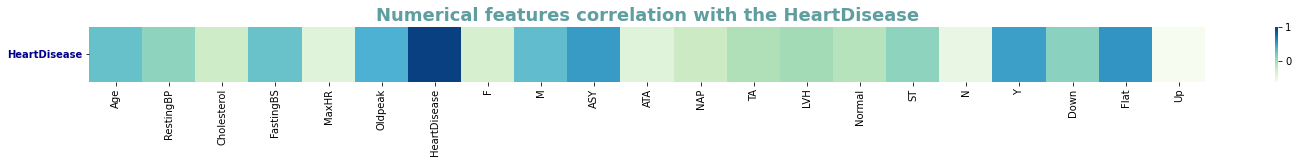

In [43]:
# Visualizing correlations with the Target Heart Disease.
import matplotlib.pyplot as plt
numeric_data = df.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["HeartDisease"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the HeartDisease", weight="bold", fontsize=18, color="#5F9EA0")
plt.yticks(weight="bold", color="darkblue", rotation=0)

plt.show()

In [44]:
Num_feature = numeric_corr["HeartDisease"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = Num_feature.style.background_gradient(cmap=cm)
style

,HeartDisease
HeartDisease,1.000000
Flat,0.554134
ASY,0.516716
Y,0.494282
Oldpeak,0.403951
M,0.305445
Age,0.282039
FastingBS,0.267291
Down,0.122527
RestingBP,0.107589


#### ***Old peak, is highly correlated with Heart Disease***

### **OBSERVATIONS FROM THE RELATIONSHIPS ABOVE.**

- Based on the gender; Men are more likely have a heart disease than women since thier correlation value is not significant.
- Person with ASY: Asymptomatic chest pain  has high chances to have a heart disease than person with ATA Atypical Angina chest pain.
- RestingECG: resting electrocardiogram results don't differ much.
- Person with ST: having ST-T wave abnormality is more likely have a heart disease than the others.
- ExerciseAngina: exercise-induced angina with 'Yes' is more likely to have a heart disease than exercise-induced angina with 'No'.
- ST_Slope Up is significantly less likely to have a heart disease than the other two segment whose correlation is insignificant and have higher chances of having a heart attack.

In [45]:
# finding total number of records in the Heart Disease column
total1 = df["HeartDisease"].value_counts()[1] + df["HeartDisease"].value_counts()[0]
print(f'The total heart patients under observation are {total1}')

The total heart patients under observation are 918


In [76]:
# identifying our numbers/ values in the different categories of the heart ie with heart disease and without heart disease.
y = df['HeartDisease']
print(f'patients with a HeartDisease(suspects):   ({y.value_counts()[1]} patient)\npatients  without a HeartDisease(normal):  ({y.value_counts()[0]} patient)')

patients with a HeartDisease(suspects):   (508 patient)
patients  without a HeartDisease(normal):  (410 patient)


1    508
0    410
Name: HeartDisease, dtype: int64


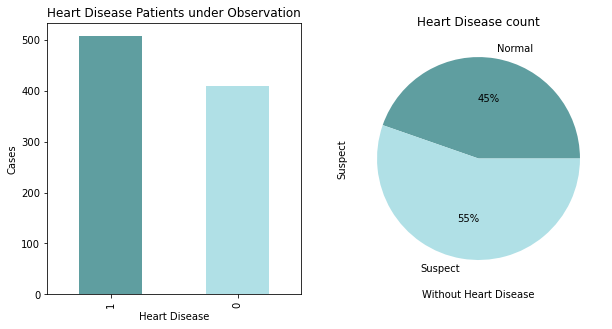

In [74]:
# Visualizing the heart disease will make it easier to detect patterns.
normal = total1 - 508
suspect = total1 - 410


print(df["HeartDisease"].value_counts())

plt.figure(figsize = (10,5))
plt.subplot(121)
# sns.countplot(x="HeartDisease", data=data)
vis_Heart_Disease = df.HeartDisease.value_counts().plot(figsize=(10, 5), kind="bar", color = ["#5F9EA0", "#B0E0E6", "#ADD8E6"])
plt.title("Heart Disease Patients under Observation")
plt.xlabel("Heart Disease")
plt.ylabel("Cases")


plt.subplot(122)
# plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.title("Heart state")

vis_pie_Heart_Disease = plt.pie([normal, suspect], labels=["Normal", "Suspect"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], autopct="%1.0f%%")
plt.title("Heart Disease count")
plt.xlabel("Without Heart Disease")
plt.ylabel("Suspect")


plt.show()

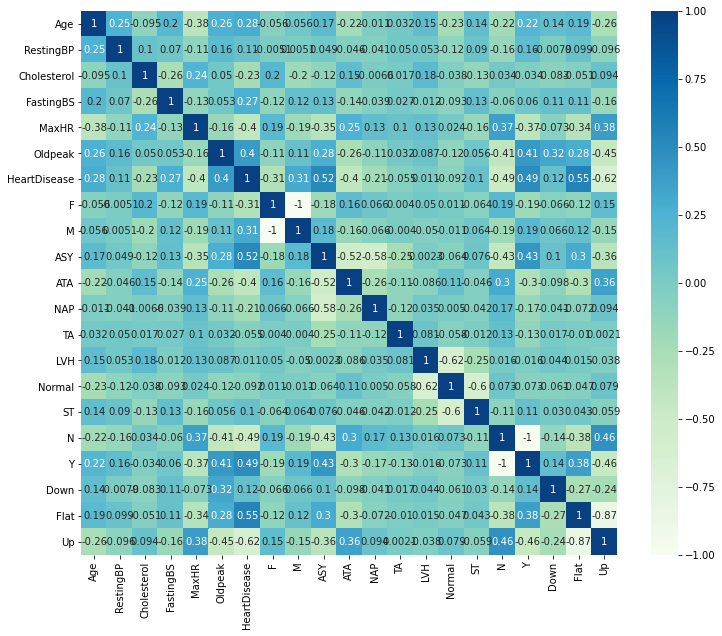

In [48]:
# Set the size of figure to 12 by 10.
plt.figure(figsize=(12,10))

# Seaborn has very simple solution for heatmap
p=sns.heatmap(df.corr(), annot=True, cmap = "GnBu")

<AxesSubplot:>

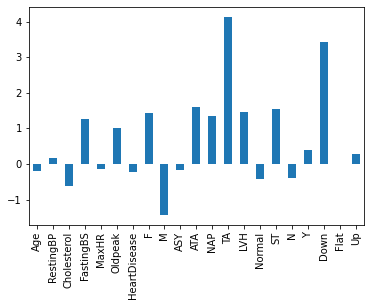

In [49]:
df.skew().plot(kind='bar')

<AxesSubplot:>

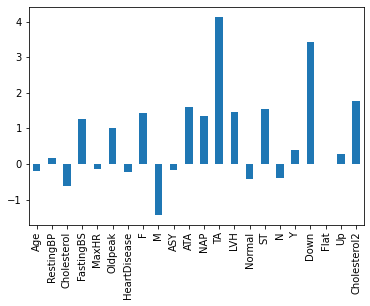

In [50]:
df_sk = df
df_sk['Cholesterol2'] = df_sk['Cholesterol']**2
df_sk.skew().plot(kind='bar')

# Scaling Data

### Techniques of scaling are Normalization and Standardization. Normalization is used when we want to bind our values between two numbers [0,1] or [-1,1].

In [51]:
df.dtypes

Age               int64
RestingBP         int64
Cholesterol       int64
FastingBS         int64
MaxHR             int64
Oldpeak         float64
HeartDisease      int64
F                 uint8
M                 uint8
ASY               uint8
ATA               uint8
NAP               uint8
TA                uint8
LVH               uint8
Normal            uint8
ST                uint8
N                 uint8
Y                 uint8
Down              uint8
Flat              uint8
Up                uint8
Cholesterol2      int64
dtype: object

In [52]:
#df1 = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak','HeartDisease']]

In [53]:
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(df.drop(["HeartDisease"],axis = 1),))
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674,0.811897
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1.938163,-1.938163,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056,-0.483197
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,-0.515952,0.515952,-1.084138,2.075177,-0.532838,-0.229679,-0.507478,-1.228087,2.038947,0.823556,-0.823556,-0.271448,-1.002181,1.150674,0.724952
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1.938163,-1.938163,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056,-0.143824
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,-0.515952,0.515952,-1.084138,-0.481887,1.876744,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,-1.002181,1.150674,-0.340693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,-0.515952,0.515952,-1.084138,-0.481887,-0.532838,4.353909,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056,0.461656
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,-0.515952,0.515952,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056,-0.360352
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,-0.515952,0.515952,0.922392,-0.481887,-0.532838,-0.229679,-0.507478,0.814275,-0.490449,-1.214246,1.214246,-0.271448,0.997824,-0.869056,-0.869260
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,1.938163,-1.938163,-1.084138,2.075177,-0.532838,-0.229679,1.970528,-1.228087,-0.490449,0.823556,-0.823556,-0.271448,0.997824,-0.869056,0.106982


In [54]:
y = df["HeartDisease"]

In [55]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up,Cholesterol2
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.210240,0.789760,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900,0.595861,0.404139,0.068627,0.501089,0.430283,51473.124183
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.407701,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567,0.490992,0.490992,0.252957,0.500271,0.495386,39494.327101
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30015.750000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,49729.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,71289.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,363609.000000


## SELECTING A MODEL

### Test Train Split and Cross Validation methods

In [56]:
# Importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((688, 21), (230, 21), (688,), (230,))

## Logistic Regression (LR)

In [58]:
# Baseline model of Logistic Regression with default parameters:

logistic_regression = linear_model.LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
print(f"Baseline Logistic Regression: {round(logistic_regression_mod.score(X_test, y_test), 3)}")

pred_logistic_regression = logistic_regression_mod.predict(X_test)

Baseline Logistic Regression: 0.891


## Linear Regression

In [59]:
linear_regression = linear_model.LinearRegression()
linear_regression_mod = linear_regression.fit(X_train, y_train)
print(f"Baseline Logistic Regression: {round(linear_regression_mod.score(X_test, y_test), 3)}")

pred_logistic_regression = linear_regression_mod.predict(X_test)

Baseline Logistic Regression: 0.587


## K-NEAREST NEIGHBOUR

In [60]:

knn = KNeighborsClassifier()
knn_mod = knn.fit(X_train, y_train)
print(f"Baseline Logistic Regression: {round(knn_mod.score(X_test, y_test), 3)}")

knn_pred = knn_mod.predict(X_test)
#print(knn_pred)


Baseline Logistic Regression: 0.9


## EXTRA TREE CLASSIFIER

In [61]:

etc = ExtraTreesClassifier()
etc_mod = etc.fit(X_train, y_train)
print(f"Baseline Extra Trees Classifier: {round(etc_mod.score(X_test, y_test), 3)}")

etc_pred = etc_mod.predict(X_test)
#print(etc_pred)


Baseline Extra Trees Classifier: 0.896


## RANDOM FOREST CLASSIFIER

In [62]:

RF = RandomForestClassifier()
RF_mod = RF.fit(X_train, y_train)
print(f"Baseline Random Forest Classifier: {round(RF_mod.score(X_test, y_test), 3)}")

RF_pred = RF_mod.predict(X_test)
#print(RF_pred)

Baseline Random Forest Classifier: 0.904


## DECISION TREE CLASSIFIER
 A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node holds a outcome label.

In [63]:
dt = DecisionTreeClassifier()
dt_mod = dt.fit(X_train, y_train)
print(f"Baseline Decision Tree Classifier: {round(dt_mod.score(X_test, y_test), 3)}")

dt_pred = dt_mod.predict(X_test)
#print(dt_pred)

Baseline Decision Tree Classifier: 0.813


## NAIVE BAYES
 A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node holds a outcome label.

In [64]:
nb = GaussianNB()
nb_mod = nb.fit(X_train, y_train)
print(f"Baseline GaussianNB: {round(nb_mod.score(X_test, y_test), 3)}")

nb_pred = nb_mod.predict(X_test)
#print(nb_pred)

Baseline GaussianNB: 0.878


## SIMPLE VECTOR MACHINE
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.it is defined by a separating hyperplane.

In [65]:
svc = SVC()
svc_mod = svc.fit(X_train, y_train)
print(f"Baseline Support Vector Classifier: {round(svc_mod.score(X_test, y_test), 3)}")

svc_pred = svc_mod.predict(X_test)
#print(svc_pred)

Baseline Support Vector Classifier: 0.891


## ADABOOST CLASSIFIER
AdaBoost is one of the initial boosting ensemble algorithms to be adapted in solving studies. It helps by combine multiple “weak classifiers” into a single “strong classifier.” The core concept of the algorithm is to fit a sequence of weak learners on repeatedly modified versions of the data. The predictions from all the Weak learners are then combined through a weighted majority vote or sum to produce the outcome/Prediction.

In [66]:
Adaboost = AdaBoostClassifier()
Adaboost_mod = Adaboost.fit(X_train, y_train)
print(f"Baseline AdaBoost Classifier: {round(Adaboost_mod.score(X_test, y_test), 3)}")

Adaboost_pred = Adaboost_mod.predict(X_test)
#print(Adaboost_pred)

Baseline AdaBoost Classifier: 0.865


## USING GRADIENT BOOSTING CLASSIFIER
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 


In [67]:
gbc = GradientBoostingClassifier()
gbc_mod = gbc.fit(X_train, y_train)
print(f"GradientBoostingClassifier: {round(gbc_mod.score(X_test, y_test), 3)}")

gbc_pred = gbc_mod.predict(X_test)
#print(gbc_pred)

GradientBoostingClassifier: 0.896


## XGB CLASSIFIER
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.

In [68]:
xgb = XGBClassifier()
xgb_mod = xgb.fit(X_train, y_train)
print(f"XGBClassifier: {round(xgb_mod.score(X_test, y_test), 3)}")

xgb_pred = xgb_mod.predict(X_test)
#print(xgb_pred)

[14:50:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier: 0.883


## LGBM CLASSIFIER

In [69]:
LGBM = LGBMClassifier()
LGBM_mod = LGBM.fit(X_train, y_train)
print(f"LGBMClassifier: {round(LGBM_mod.score(X_test, y_test), 3)}")

LGBM_pred = LGBM_mod.predict(X_test)
#print(LGBM_pred)

LGBMClassifier: 0.891


## CAT BOOST CLASSIFIER 
Handling Categorical features automatically: We can use CatBoost without 
any explicit pre-processing to convert categories into numbers.

In [70]:
cb = CatBoostClassifier()
cb_mod = cb.fit(X_train, y_train)
print(f"CatBoostClassifier: {round(cb_mod.score(X_test, y_test), 3)}")

cb_pred = cb_mod.predict(X_test)
#print(cb_pred)

Learning rate set to 0.008782
0:	learn: 0.6853995	total: 166ms	remaining: 2m 46s
1:	learn: 0.6786887	total: 175ms	remaining: 1m 27s
2:	learn: 0.6705785	total: 179ms	remaining: 59.3s
3:	learn: 0.6639395	total: 182ms	remaining: 45.4s
4:	learn: 0.6558118	total: 186ms	remaining: 36.9s
5:	learn: 0.6491488	total: 189ms	remaining: 31.4s
6:	learn: 0.6408217	total: 193ms	remaining: 27.3s
7:	learn: 0.6339081	total: 195ms	remaining: 24.2s
8:	learn: 0.6275057	total: 198ms	remaining: 21.8s
9:	learn: 0.6205451	total: 200ms	remaining: 19.8s
10:	learn: 0.6152455	total: 202ms	remaining: 18.2s
11:	learn: 0.6091471	total: 204ms	remaining: 16.8s
12:	learn: 0.6024548	total: 206ms	remaining: 15.7s
13:	learn: 0.5971089	total: 209ms	remaining: 14.7s
14:	learn: 0.5920239	total: 211ms	remaining: 13.8s
15:	learn: 0.5866134	total: 213ms	remaining: 13.1s
16:	learn: 0.5815777	total: 215ms	remaining: 12.4s
17:	learn: 0.5755437	total: 217ms	remaining: 11.8s
18:	learn: 0.5710236	total: 219ms	remaining: 11.3s
19:	learn

204:	learn: 0.2637051	total: 675ms	remaining: 2.62s
205:	learn: 0.2628819	total: 679ms	remaining: 2.62s
206:	learn: 0.2619615	total: 682ms	remaining: 2.61s
207:	learn: 0.2616095	total: 685ms	remaining: 2.61s
208:	learn: 0.2610183	total: 688ms	remaining: 2.6s
209:	learn: 0.2604611	total: 691ms	remaining: 2.6s
210:	learn: 0.2598620	total: 696ms	remaining: 2.6s
211:	learn: 0.2594578	total: 698ms	remaining: 2.6s
212:	learn: 0.2591114	total: 701ms	remaining: 2.59s
213:	learn: 0.2588403	total: 705ms	remaining: 2.59s
214:	learn: 0.2584926	total: 709ms	remaining: 2.59s
215:	learn: 0.2582040	total: 712ms	remaining: 2.58s
216:	learn: 0.2576323	total: 714ms	remaining: 2.57s
217:	learn: 0.2573319	total: 715ms	remaining: 2.56s
218:	learn: 0.2569349	total: 717ms	remaining: 2.56s
219:	learn: 0.2563839	total: 719ms	remaining: 2.55s
220:	learn: 0.2559243	total: 721ms	remaining: 2.54s
221:	learn: 0.2553428	total: 723ms	remaining: 2.53s
222:	learn: 0.2549607	total: 725ms	remaining: 2.53s
223:	learn: 0.25

364:	learn: 0.2091643	total: 1.17s	remaining: 2.04s
365:	learn: 0.2089659	total: 1.18s	remaining: 2.04s
366:	learn: 0.2086502	total: 1.18s	remaining: 2.04s
367:	learn: 0.2084768	total: 1.18s	remaining: 2.03s
368:	learn: 0.2081565	total: 1.19s	remaining: 2.03s
369:	learn: 0.2078421	total: 1.19s	remaining: 2.03s
370:	learn: 0.2075553	total: 1.2s	remaining: 2.03s
371:	learn: 0.2073965	total: 1.2s	remaining: 2.03s
372:	learn: 0.2072224	total: 1.21s	remaining: 2.03s
373:	learn: 0.2069595	total: 1.21s	remaining: 2.02s
374:	learn: 0.2068177	total: 1.21s	remaining: 2.02s
375:	learn: 0.2064819	total: 1.22s	remaining: 2.02s
376:	learn: 0.2063347	total: 1.23s	remaining: 2.02s
377:	learn: 0.2060868	total: 1.23s	remaining: 2.02s
378:	learn: 0.2056178	total: 1.24s	remaining: 2.02s
379:	learn: 0.2052996	total: 1.24s	remaining: 2.02s
380:	learn: 0.2050024	total: 1.24s	remaining: 2.02s
381:	learn: 0.2048517	total: 1.25s	remaining: 2.02s
382:	learn: 0.2047064	total: 1.25s	remaining: 2.02s
383:	learn: 0.

557:	learn: 0.1691850	total: 1.87s	remaining: 1.48s
558:	learn: 0.1688311	total: 1.88s	remaining: 1.48s
559:	learn: 0.1685929	total: 1.88s	remaining: 1.48s
560:	learn: 0.1683879	total: 1.88s	remaining: 1.47s
561:	learn: 0.1682854	total: 1.89s	remaining: 1.47s
562:	learn: 0.1682462	total: 1.89s	remaining: 1.47s
563:	learn: 0.1680526	total: 1.9s	remaining: 1.47s
564:	learn: 0.1679669	total: 1.9s	remaining: 1.46s
565:	learn: 0.1677880	total: 1.9s	remaining: 1.46s
566:	learn: 0.1676427	total: 1.91s	remaining: 1.46s
567:	learn: 0.1674099	total: 1.91s	remaining: 1.45s
568:	learn: 0.1671277	total: 1.91s	remaining: 1.45s
569:	learn: 0.1670040	total: 1.91s	remaining: 1.44s
570:	learn: 0.1668017	total: 1.92s	remaining: 1.44s
571:	learn: 0.1665864	total: 1.92s	remaining: 1.44s
572:	learn: 0.1664979	total: 1.92s	remaining: 1.43s
573:	learn: 0.1663470	total: 1.92s	remaining: 1.43s
574:	learn: 0.1661885	total: 1.93s	remaining: 1.42s
575:	learn: 0.1660260	total: 1.93s	remaining: 1.42s
576:	learn: 0.1

721:	learn: 0.1441886	total: 2.38s	remaining: 916ms
722:	learn: 0.1441060	total: 2.38s	remaining: 913ms
723:	learn: 0.1438445	total: 2.39s	remaining: 910ms
724:	learn: 0.1437310	total: 2.39s	remaining: 906ms
725:	learn: 0.1436738	total: 2.39s	remaining: 903ms
726:	learn: 0.1435218	total: 2.4s	remaining: 900ms
727:	learn: 0.1432862	total: 2.4s	remaining: 897ms
728:	learn: 0.1431059	total: 2.4s	remaining: 893ms
729:	learn: 0.1430262	total: 2.4s	remaining: 890ms
730:	learn: 0.1429099	total: 2.41s	remaining: 886ms
731:	learn: 0.1428116	total: 2.41s	remaining: 883ms
732:	learn: 0.1426870	total: 2.42s	remaining: 880ms
733:	learn: 0.1426026	total: 2.42s	remaining: 877ms
734:	learn: 0.1423835	total: 2.42s	remaining: 874ms
735:	learn: 0.1422647	total: 2.43s	remaining: 871ms
736:	learn: 0.1421530	total: 2.43s	remaining: 868ms
737:	learn: 0.1420530	total: 2.44s	remaining: 865ms
738:	learn: 0.1417891	total: 2.44s	remaining: 862ms
739:	learn: 0.1416854	total: 2.44s	remaining: 858ms
740:	learn: 0.14

909:	learn: 0.1214353	total: 2.9s	remaining: 287ms
910:	learn: 0.1213375	total: 2.9s	remaining: 284ms
911:	learn: 0.1212936	total: 2.9s	remaining: 280ms
912:	learn: 0.1211531	total: 2.91s	remaining: 277ms
913:	learn: 0.1211163	total: 2.91s	remaining: 274ms
914:	learn: 0.1210262	total: 2.91s	remaining: 271ms
915:	learn: 0.1209759	total: 2.92s	remaining: 267ms
916:	learn: 0.1208787	total: 2.92s	remaining: 264ms
917:	learn: 0.1205793	total: 2.92s	remaining: 261ms
918:	learn: 0.1205186	total: 2.92s	remaining: 258ms
919:	learn: 0.1204714	total: 2.93s	remaining: 255ms
920:	learn: 0.1204558	total: 2.93s	remaining: 251ms
921:	learn: 0.1203849	total: 2.93s	remaining: 248ms
922:	learn: 0.1202301	total: 2.94s	remaining: 245ms
923:	learn: 0.1201245	total: 2.94s	remaining: 242ms
924:	learn: 0.1199494	total: 2.94s	remaining: 238ms
925:	learn: 0.1198443	total: 2.94s	remaining: 235ms
926:	learn: 0.1197705	total: 2.94s	remaining: 232ms
927:	learn: 0.1196689	total: 2.95s	remaining: 229ms
928:	learn: 0.1

## SELECTING BEST PERFOMING MODEL (CAT BOOST CLASSIFIER)

In [71]:
cb = CatBoostClassifier()
cb_mod = cb.fit(X_train, y_train)
print(f"CatBoostClassifier: {round(cb_mod.score(X_test, y_test), 3)}")

cb_pred = cb_mod.predict(X_test)
#print(cb_pred)

Learning rate set to 0.008782
0:	learn: 0.6853995	total: 3.95ms	remaining: 3.95s
1:	learn: 0.6786887	total: 6.21ms	remaining: 3.1s
2:	learn: 0.6705785	total: 8.78ms	remaining: 2.92s
3:	learn: 0.6639395	total: 11ms	remaining: 2.73s
4:	learn: 0.6558118	total: 12.9ms	remaining: 2.58s
5:	learn: 0.6491488	total: 14.7ms	remaining: 2.44s
6:	learn: 0.6408217	total: 18.2ms	remaining: 2.58s
7:	learn: 0.6339081	total: 19.6ms	remaining: 2.43s
8:	learn: 0.6275057	total: 24ms	remaining: 2.64s
9:	learn: 0.6205451	total: 26.6ms	remaining: 2.63s
10:	learn: 0.6152455	total: 28ms	remaining: 2.51s
11:	learn: 0.6091471	total: 29.9ms	remaining: 2.46s
12:	learn: 0.6024548	total: 33.5ms	remaining: 2.54s
13:	learn: 0.5971089	total: 35.9ms	remaining: 2.53s
14:	learn: 0.5920239	total: 38.2ms	remaining: 2.51s
15:	learn: 0.5866134	total: 41ms	remaining: 2.52s
16:	learn: 0.5815777	total: 43.4ms	remaining: 2.51s
17:	learn: 0.5755437	total: 46.2ms	remaining: 2.52s
18:	learn: 0.5710236	total: 48.6ms	remaining: 2.51s
1

172:	learn: 0.2803101	total: 349ms	remaining: 1.67s
173:	learn: 0.2798008	total: 353ms	remaining: 1.68s
174:	learn: 0.2791843	total: 356ms	remaining: 1.68s
175:	learn: 0.2787971	total: 358ms	remaining: 1.68s
176:	learn: 0.2783187	total: 361ms	remaining: 1.68s
177:	learn: 0.2776342	total: 363ms	remaining: 1.68s
178:	learn: 0.2766410	total: 365ms	remaining: 1.68s
179:	learn: 0.2759906	total: 370ms	remaining: 1.68s
180:	learn: 0.2756126	total: 373ms	remaining: 1.69s
181:	learn: 0.2750880	total: 376ms	remaining: 1.69s
182:	learn: 0.2744274	total: 380ms	remaining: 1.7s
183:	learn: 0.2737821	total: 382ms	remaining: 1.69s
184:	learn: 0.2731342	total: 386ms	remaining: 1.7s
185:	learn: 0.2725894	total: 389ms	remaining: 1.7s
186:	learn: 0.2720221	total: 392ms	remaining: 1.71s
187:	learn: 0.2714710	total: 395ms	remaining: 1.7s
188:	learn: 0.2705843	total: 397ms	remaining: 1.7s
189:	learn: 0.2705144	total: 398ms	remaining: 1.7s
190:	learn: 0.2700802	total: 401ms	remaining: 1.7s
191:	learn: 0.26954

368:	learn: 0.2081565	total: 851ms	remaining: 1.46s
369:	learn: 0.2078421	total: 853ms	remaining: 1.45s
370:	learn: 0.2075553	total: 857ms	remaining: 1.45s
371:	learn: 0.2073965	total: 860ms	remaining: 1.45s
372:	learn: 0.2072224	total: 863ms	remaining: 1.45s
373:	learn: 0.2069595	total: 865ms	remaining: 1.45s
374:	learn: 0.2068177	total: 867ms	remaining: 1.45s
375:	learn: 0.2064819	total: 870ms	remaining: 1.44s
376:	learn: 0.2063347	total: 872ms	remaining: 1.44s
377:	learn: 0.2060868	total: 875ms	remaining: 1.44s
378:	learn: 0.2056178	total: 877ms	remaining: 1.44s
379:	learn: 0.2052996	total: 882ms	remaining: 1.44s
380:	learn: 0.2050024	total: 885ms	remaining: 1.44s
381:	learn: 0.2048517	total: 889ms	remaining: 1.44s
382:	learn: 0.2047064	total: 893ms	remaining: 1.44s
383:	learn: 0.2045078	total: 895ms	remaining: 1.44s
384:	learn: 0.2042942	total: 898ms	remaining: 1.43s
385:	learn: 0.2040753	total: 902ms	remaining: 1.43s
386:	learn: 0.2038507	total: 904ms	remaining: 1.43s
387:	learn: 

569:	learn: 0.1670040	total: 1.36s	remaining: 1.03s
570:	learn: 0.1668017	total: 1.36s	remaining: 1.03s
571:	learn: 0.1665864	total: 1.37s	remaining: 1.02s
572:	learn: 0.1664979	total: 1.37s	remaining: 1.02s
573:	learn: 0.1663470	total: 1.37s	remaining: 1.02s
574:	learn: 0.1661885	total: 1.38s	remaining: 1.02s
575:	learn: 0.1660260	total: 1.38s	remaining: 1.01s
576:	learn: 0.1658578	total: 1.38s	remaining: 1.01s
577:	learn: 0.1655970	total: 1.38s	remaining: 1.01s
578:	learn: 0.1654153	total: 1.39s	remaining: 1.01s
579:	learn: 0.1652234	total: 1.39s	remaining: 1.01s
580:	learn: 0.1650681	total: 1.39s	remaining: 1s
581:	learn: 0.1649043	total: 1.43s	remaining: 1.03s
582:	learn: 0.1647151	total: 1.44s	remaining: 1.03s
583:	learn: 0.1645160	total: 1.44s	remaining: 1.02s
584:	learn: 0.1642684	total: 1.44s	remaining: 1.02s
585:	learn: 0.1641960	total: 1.44s	remaining: 1.02s
586:	learn: 0.1640742	total: 1.45s	remaining: 1.02s
587:	learn: 0.1640089	total: 1.46s	remaining: 1.02s
588:	learn: 0.1

784:	learn: 0.1358295	total: 1.89s	remaining: 517ms
785:	learn: 0.1357302	total: 1.89s	remaining: 515ms
786:	learn: 0.1356039	total: 1.89s	remaining: 512ms
787:	learn: 0.1354063	total: 1.89s	remaining: 510ms
788:	learn: 0.1353285	total: 1.9s	remaining: 507ms
789:	learn: 0.1352571	total: 1.9s	remaining: 505ms
790:	learn: 0.1350350	total: 1.9s	remaining: 503ms
791:	learn: 0.1349880	total: 1.9s	remaining: 500ms
792:	learn: 0.1347954	total: 1.91s	remaining: 498ms
793:	learn: 0.1346691	total: 1.91s	remaining: 495ms
794:	learn: 0.1345185	total: 1.91s	remaining: 493ms
795:	learn: 0.1344387	total: 1.92s	remaining: 491ms
796:	learn: 0.1343570	total: 1.92s	remaining: 489ms
797:	learn: 0.1342067	total: 1.92s	remaining: 486ms
798:	learn: 0.1340379	total: 1.92s	remaining: 484ms
799:	learn: 0.1339275	total: 1.93s	remaining: 481ms
800:	learn: 0.1336597	total: 1.93s	remaining: 479ms
801:	learn: 0.1335442	total: 1.93s	remaining: 476ms
802:	learn: 0.1334683	total: 1.93s	remaining: 474ms
803:	learn: 0.13

968:	learn: 0.1153988	total: 2.24s	remaining: 71.8ms
969:	learn: 0.1153517	total: 2.25s	remaining: 69.5ms
970:	learn: 0.1152664	total: 2.25s	remaining: 67.2ms
971:	learn: 0.1151940	total: 2.25s	remaining: 64.9ms
972:	learn: 0.1151166	total: 2.25s	remaining: 62.6ms
973:	learn: 0.1149631	total: 2.26s	remaining: 60.2ms
974:	learn: 0.1148853	total: 2.26s	remaining: 57.9ms
975:	learn: 0.1147993	total: 2.26s	remaining: 55.6ms
976:	learn: 0.1147509	total: 2.27s	remaining: 53.3ms
977:	learn: 0.1146083	total: 2.27s	remaining: 51ms
978:	learn: 0.1145889	total: 2.27s	remaining: 48.7ms
979:	learn: 0.1145077	total: 2.27s	remaining: 46.4ms
980:	learn: 0.1144417	total: 2.27s	remaining: 44ms
981:	learn: 0.1143692	total: 2.27s	remaining: 41.7ms
982:	learn: 0.1143293	total: 2.28s	remaining: 39.4ms
983:	learn: 0.1142649	total: 2.28s	remaining: 37.1ms
984:	learn: 0.1141928	total: 2.28s	remaining: 34.8ms
985:	learn: 0.1141552	total: 2.28s	remaining: 32.4ms
986:	learn: 0.1140861	total: 2.29s	remaining: 30.1

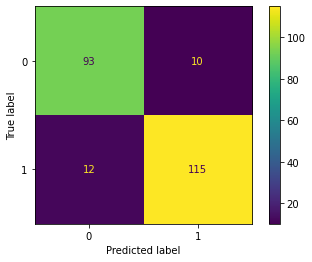

In [72]:
# plotting a confusion matrix to view true positives,false positives, true Negatives and false Negatives.

confusion_matrix1  =confusion_matrix(y_test, cb_pred)
display = ConfusionMatrixDisplay(confusion_matrix1).plot()
display

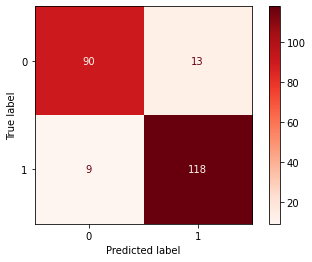

In [75]:
plot_confusion_matrix(RF, X_test, y_test, cmap=plt.cm.Reds)

#### CatBoost clasifier and Random forest classifier had the highest accuracy of 90.4 % but cat boost gave more consistent values, therfore the best model I chose was the cat boost classifier.
#### 93 normal cases were correclty classified as normal cases while 10 normal cases were wrongly classified as suspect cases.

#### 115 suspect cases were correclty classified as suspect cases while 12 suspect cases were wrongly classified as normal cases.